# Plot logos with python `logomaker`

## Description

This small notebook shows examples of how to use the python package `logomaker` to plot different types of logos.

- 'Logos' are a type of visualization that shows the probability of certain bases at certain positions in a sequence
- the underlying data is a matrix of aligned DNA or RNA sequences, in fasta format or as a data frame
- Probability of enrichment or depletion of certain bases is visualized by magnified or shrinked one-letter symbols for each position

## Requirements

- need to install `logomaker` e.g. with pip
- optionally need `biopython` for sequence import and transformations
- can set up virtual environment for local package installs
- or simply using `pip install` will install a package in the user's local site library

To install from a python chunk in a jupyter notebook, run:

```python
import sys
!{sys.executable} -m pip install logomaker biopython requests
```

- import libraries

In [64]:
import Bio.SeqIO
import Bio.SeqUtils
import numpy as np
import matplotlib.pyplot as plt
from requests import get
from io import StringIO
import logomaker

## Data import

- first step is to import the data in fasta format
- use biopython to parse the fasta file
- extract the sequences only and convert to list

In [65]:
path_fasta = ("../data/motif_alignments.fa")
fasta_db = Bio.SeqIO.parse(path_fasta, "fasta")
fasta_db = [str(i.seq) for i in fasta_db]

In [66]:
fasta_db[0:5]

['AGAGAAGGAAAUAUCGAGAAAUGCCACAGGGAACUGUGAAGUGGUUCAAC',
 'GCUUCAUGAUCGUCGGUUGCUCCCCAGCGGUCACCGGCGGUGACACCACC',
 'UGUCCGGAGCAACCCACCACAUGCCAAGUCCCUCCGUCACCUCGCCGCAA',
 'UCGUGGCGAGCGUGAACAUCAAGCCACUCGAGGACAAGAUCCUCGUUCAG',
 'UCGCCAACUUCACCGUGGCGUCGACACCGCGCAUGUUCGACCGCCAGAGC']

- sequence data can be stored to a matrix of nucleotide (cols) X sequence positions (rows)
- values can be one of ‘counts’, ‘probability’, ‘weight’, or ‘information’

In [67]:
logomaker.alignment_to_matrix(fasta_db, to_type="counts")[0:5]

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


,A,C,G,U
pos,,,,
0,5.0,9.0,7.0,5.0
1,4.0,13.0,9.0,0.0
2,8.0,6.0,6.0,6.0
3,5.0,6.0,5.0,10.0
4,4.0,9.0,8.0,5.0


In [68]:
logomaker.alignment_to_matrix(fasta_db, to_type="weight")[0:5]

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


,A,C,G,U
pos,,,,
0,-0.321928,0.415037,0.093109,-0.321928
1,-0.584963,0.900464,0.415037,-2.906891
2,0.263034,-0.099536,-0.099536,-0.099536
3,-0.321928,-0.099536,-0.321928,0.552541
4,-0.584963,0.415037,0.263034,-0.321928


- supply a custom background matrix in order to correct for the GC content of your organism
- example: Streptococcus pyogenes has GC content 39%, AT content 61%: probability for A and T: 0.305, and for G and C: 0.195
- compare the following computed weights with the previous without GC correction

In [69]:
array_bg = [0.305, 0.195, 0.195, 0.305]
logomaker.alignment_to_matrix(
    fasta_db, to_type="weight", background=np.array([0.305, 0.195, 0.195, 0.305])
)[0:5]

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


,A,C,G,U
pos,,,,
0,-0.608809,0.773491,0.451563,-0.608809
1,-0.871844,1.258918,0.773491,-3.193772
2,-0.023847,0.258918,0.258918,-0.386417
3,-0.608809,0.258918,0.036526,0.265660
4,-0.871844,0.773491,0.621488,-0.608809


## Logo plots

- logo plot depends on the type of input
- default for centered logos can be `weight`
- make a generalized function for plotting

In [70]:
def plot_logo(data, to_type="weight", background=None,
    ignore="", title="", ylim=[-6, 2],
    colors = "classic", vpad=0, figsize = [10,3]):
    data_logo = logomaker.alignment_to_matrix(
        data, to_type=to_type, background=background,
        characters_to_ignore=ignore
    )
    data_logo.index = data_logo.index + 1
    title = "{0} (n = {1})".format(title, len(data))
    logo = logomaker.Logo(data_logo,
        fade_below=0.33, flip_below = False,
        color_scheme=colors,
        vpad=vpad, figsize = figsize)
    logo.ax.set_ylim(ylim)
    logo.ax.text(0.5, ylim[1] + 0.1, title, fontsize=14)
    logo.ax.set_xticks(np.arange(2, len(data[0]) + 1, 2))

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


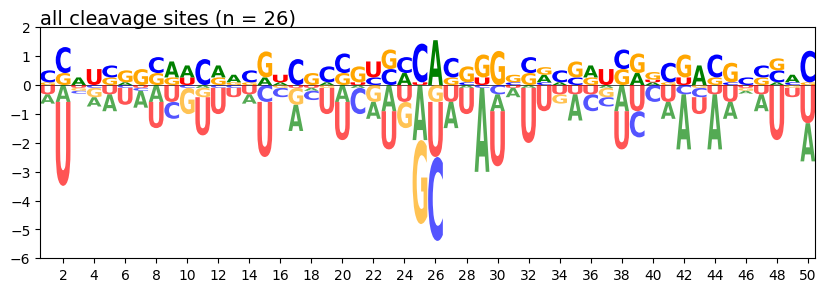

In [71]:
plot_logo(fasta_db, title="all cleavage sites")

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


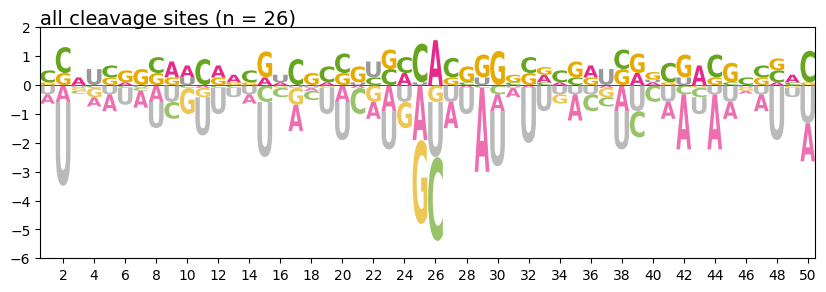

In [72]:
# define custom colors for the four bases
colors = {"A": "#E7298A", "C": "#66A61E", "G": "#E6AB02", "U": "#999999"}
plot_logo(fasta_db, title="all cleavage sites", colors=colors)

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


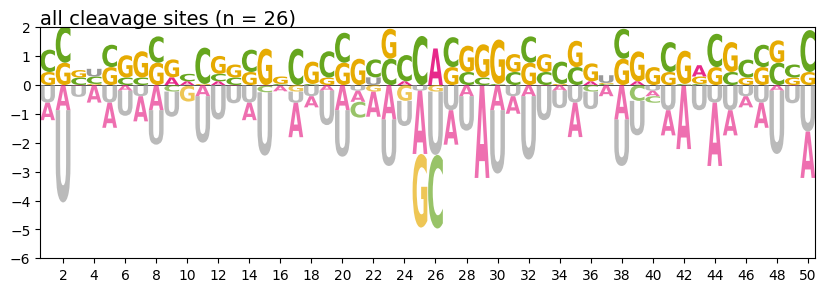

In [73]:
# use a custom background array for A, C, G, U
plot_logo(fasta_db, title="all cleavage sites",
    background=np.array([0.305, 0.195, 0.195, 0.305]),
    colors=colors
)

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


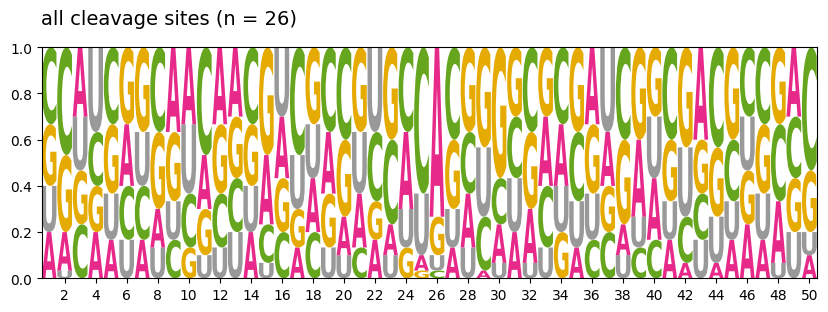

In [74]:
# use probability instead of weight as alternative
plot_logo(fasta_db, title="all cleavage sites", colors=colors,
    to_type="probability", ylim=[0, 1])

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


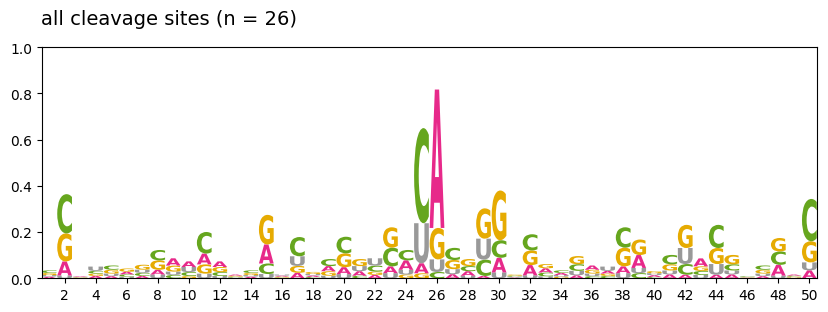

In [75]:
# use information instead of weight as alternative
plot_logo(fasta_db, title="all cleavage sites", colors=colors,
    to_type="information", ylim=[0, 1])

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


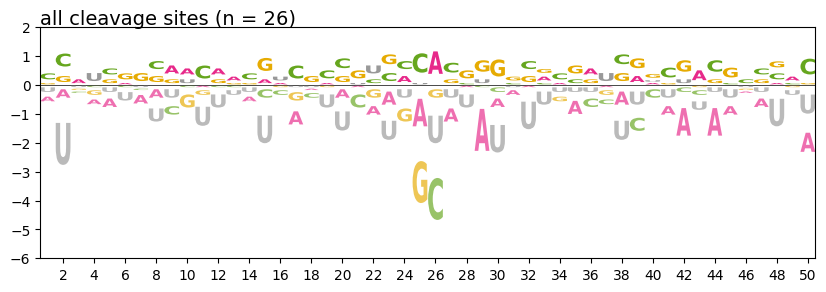

In [76]:
# leave more space between letters: vpad parameter between 0 and 1
plot_logo(fasta_db, title="all cleavage sites", colors=colors, vpad = 0.5)

/home/michael/micromamba/envs/jupyter/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


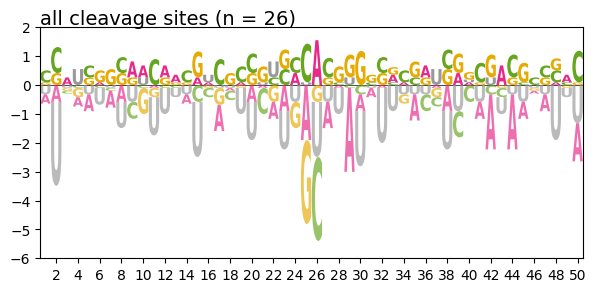

In [80]:
# change size and xport figure
plot_logo(fasta_db, title="all cleavage sites", colors=colors, figsize = [7.0,3.0])
plt.savefig("../output/sequence_logo.svg")

## Session info

In [78]:
!pip freeze

asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1667325728359/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
biopython==1.79
black==22.10.0
certifi==2022.9.24
charset-normalizer==3.0.1
click==8.1.3
contourpy==1.0.6
cycler==0.11.0
debugpy @ file:///tmp/build/80754af9/debugpy_1637091799509/work
decorator @ file:///home/conda/feedstock_root/build_artifacts/decorator_1641555617451/work
entrypoints @ file:///home/conda/feedstock_root/build_artifacts/entrypoints_1643888246732/work
executing @ file:///home/conda/feedstock_root/build_artifacts/executing_1667317341051/work
fonttools==4.38.0
idna==3.4
ipykernel @ file:///home/conda/feedstock_root/build_artifacts/ipykernel_1667262163608/work
ipython @ file:///home/conda/feedstock_root/build_artifacts/ipython_1667140637743/work
jedi @ file:///home/c